In [ ]:
#imported packages such as pandas, numpy, matploblib and seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Model evaluations
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Models from Scikit-Learn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

## Data Exploration

In [ ]:
df = pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0


In [ ]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [ ]:
df.info(null_counts=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            6362620 non-null  int64  
 1   type            6362620 non-null  object 
 2   amount          6362620 non-null  float64
 3   nameOrig        6362620 non-null  object 
 4   oldbalanceOrg   6362620 non-null  float64
 5   newbalanceOrig  6362620 non-null  float64
 6   nameDest        6362620 non-null  object 
 7   oldbalanceDest  6362620 non-null  float64
 8   newbalanceDest  6362620 non-null  float64
 9   isFraud         6362620 non-null  int64  
 10  isFlaggedFraud  6362620 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.isnull().values.any()

False

In [ ]:
{column: len(df[column].unique()) for column in df.columns}

{'step': 743,
 'type': 5,
 'amount': 5316900,
 'nameOrig': 6353307,
 'oldbalanceOrg': 1845844,
 'newbalanceOrig': 2682586,
 'nameDest': 2722362,
 'oldbalanceDest': 3614697,
 'newbalanceDest': 3555499,
 'isFraud': 2,
 'isFlaggedFraud': 2}

In [ ]:
df = df.drop(['step','nameOrig', 'nameDest'], axis=1)

In [ ]:
print(df['isFraud'].unique())
print(df['isFlaggedFraud'].unique())

[0 1]
[0 1]


[Text(0, 0, '6354407'), Text(0, 0, '8213')]

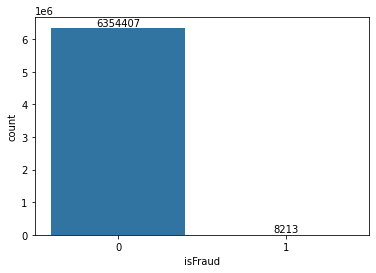

In [ ]:
#check isFraud bar chart, Non Fraud vs Fraud (0,1)
ax = sns.countplot(x=df['isFraud'],
                   order=df['isFraud'].value_counts(ascending=False).index);
abs_values = df['isFraud'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

[Text(0, 0, '6362604'), Text(0, 0, '16')]

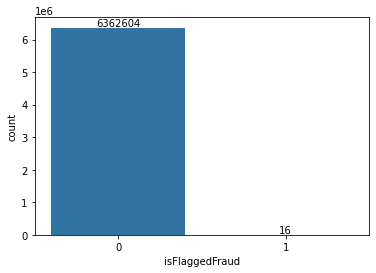

In [ ]:
#check isFlaggedFraud, we need to remove this column as it doesn't classify the transactions as fraud
ax = sns.countplot(x=df['isFlaggedFraud'],
                   order=df['isFlaggedFraud'].value_counts(ascending=False).index);
abs_values = df['isFlaggedFraud'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

In [ ]:
print(df['type'].unique()) #check unique values in type column

['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


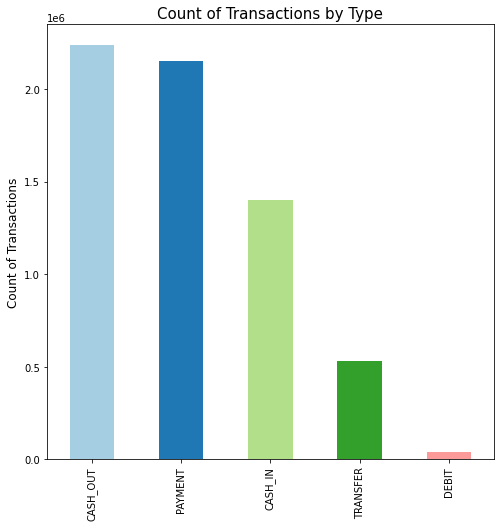

In [ ]:
#data exploration for type and transactions
print(df.type.value_counts())

f, ax = plt.subplots(1, 1, figsize=(4, 2))
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
df.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8),color=plt.cm.Paired(np.arange(len(df.type.unique()))))
plt.ylabel("Count of Transactions", size=12)
plt.title("Count of Transactions by Type", size=15)
plt.show()

In [ ]:
le = preprocessing.LabelEncoder()
df.type = le.fit_transform(df.type)

In [ ]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,3,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,3,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,4,181.00,181.00,0.00,0.00,0.00,1,0
3,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,3,11668.14,41554.00,29885.86,0.00,0.00,0,0


In [ ]:
df.describe()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,1.71,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,1.35,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,3.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,4.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


In [ ]:
#Setting feature vector and target variable
target_variable = 'isFraud'
y = df.isFraud #add target variable Severity to y - dependent variable
X = df.drop(['isFraud','isFlaggedFraud'], axis=1)  #remove target variable from x features, and rest are features

In [ ]:
print('The shape of X and y are')
print(X.shape, y.shape)

The shape of X and y are
(6362620, 6) (6362620,)


In [ ]:
y.head() #show y variable just to double check

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(X)

In [ ]:
df3 = pd.DataFrame(x_scaled) #change to dataframe from array that was created in standard scaler function

In [ ]:
df3.columns = X.columns #create column names based on X

In [ ]:
df3.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,0.95,-0.28,-0.23,-0.24,-0.32,-0.33
1,0.95,-0.29,-0.28,-0.29,-0.32,-0.33
2,1.69,-0.30,-0.29,-0.29,-0.32,-0.33
3,-0.53,-0.30,-0.29,-0.29,-0.32,-0.33
4,0.95,-0.28,-0.27,-0.28,-0.32,-0.33


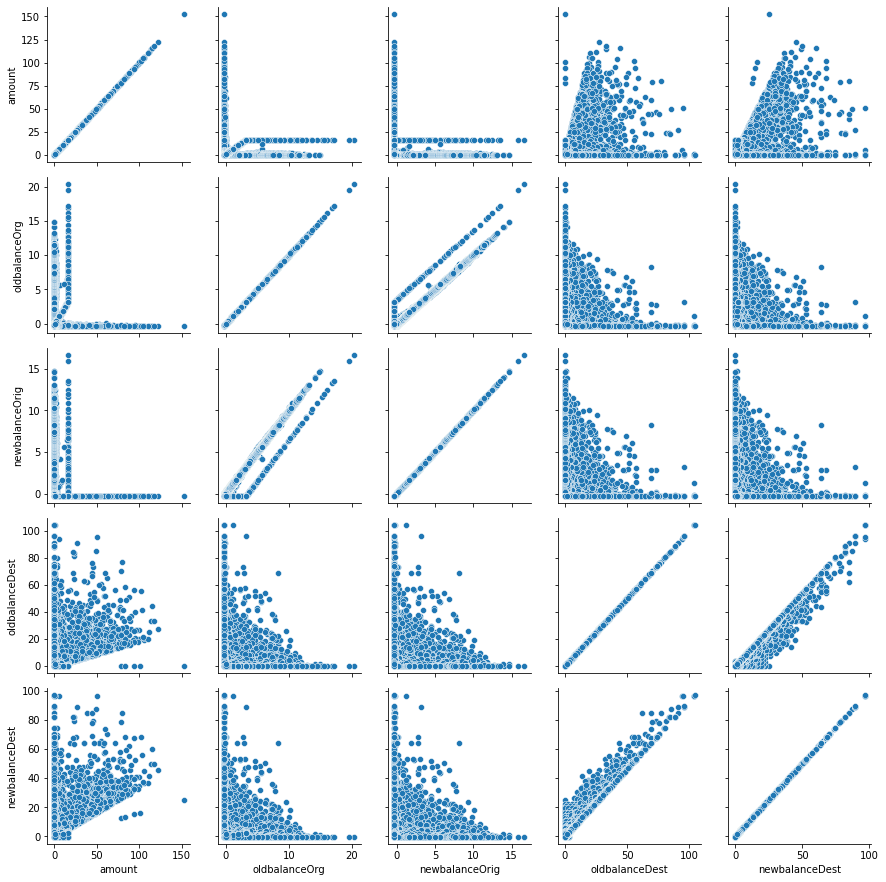

In [ ]:
g = sns.PairGrid(df3[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]) #df3 removing type as categorical variable
g.map(sns.scatterplot)  #create scatterplot to see the behavior of the features/relationship of features.

#there is a non-linear relationship between OldbalanceOrg and Oldbalancedest and newbalancedest


In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_over, y_over = undersample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 8213, 1: 8213})


In [ ]:
y_over

0        0
1        0
2        0
3        0
4        0
        ..
16421    1
16422    1
16423    1
16424    1
16425    1
Name: isFraud, Length: 16426, dtype: int64

In [ ]:
X_over.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,3,5127.38,0.00,0.00,0.00,0.00
1,4,909361.04,0.00,0.00,6256928.60,7166289.63
2,4,781391.10,0.00,0.00,1088922.35,1870313.45
3,1,134870.48,0.00,0.00,2819359.24,3486491.10
4,3,10600.39,76547.28,65946.89,0.00,0.00


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over,test_size=0.5,random_state=1,shuffle=True)

In [ ]:
len(y_train)

8213

<AxesSubplot:>

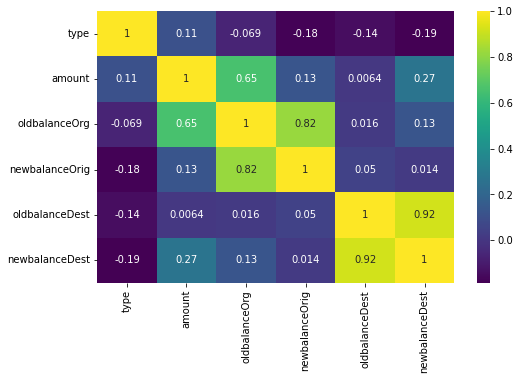

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
corr = X_over.corr()
sns.heatmap(corr, cmap="viridis", annot=True)

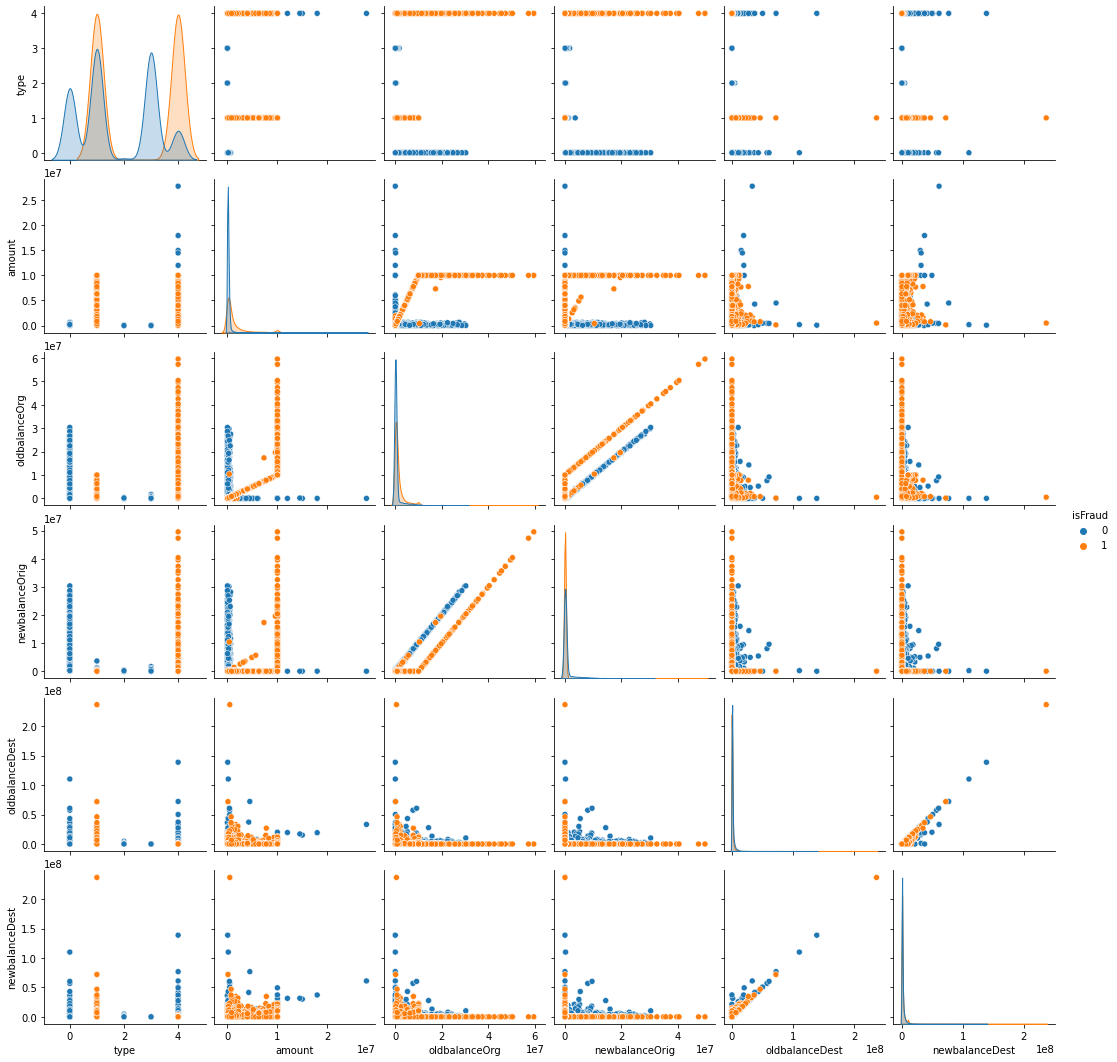

In [ ]:
sns.pairplot(pd.merge(X_over,pd.DataFrame(y_over),how="left",left_index=True, right_index=True), hue="isFraud",kind='scatter')

## **Features Engineering: Feature Importance by Random Forest**

In [ ]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model to the training set

clf.fit(X_over, y_over)

RandomForestClassifier(random_state=42)

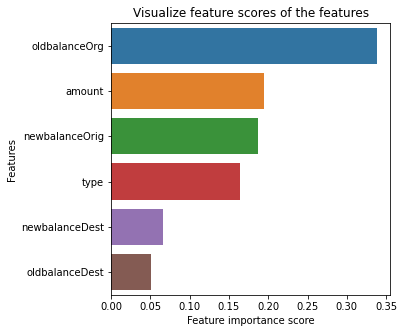

In [ ]:
feature_scores = pd.Series(clf.feature_importances_, index=X_over.columns).sort_values(ascending=False)

pd.DataFrame(feature_scores)

# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(5, 5))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

### Exploring Classifiers to build final machine learning model

**K-Nearest Neighbors (KNN)**

In [ ]:
## Grid Search KNN
## Determining the number of neighbors using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'n_neighbors': range(1,20)}
knn = RandomizedSearchCV(KNeighborsClassifier(), param_grid, verbose=3)
knn.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_neighbors=13 ..................................................
[CV] ...................... n_neighbors=13, score=0.925, total=   0.1s
[CV] n_neighbors=13 ..................................................
[CV] ...................... n_neighbors=13, score=0.930, total=   0.1s
[CV] n_neighbors=13 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ...................... n_neighbors=13, score=0.932, total=   0.1s
[CV] n_neighbors=13 ..................................................
[CV] ...................... n_neighbors=13, score=0.942, total=   0.1s
[CV] n_neighbors=13 ..................................................
[CV] ...................... n_neighbors=13, score=0.934, total=   0.1s
[CV] n_neighbors=6 ...................................................
[CV] ....................... n_neighbors=6, score=0.934, total=   0.1s
[CV] n_neighbors=6 ...................................................
[CV] ....................... n_neighbors=6, score=0.941, total=   0.1s
[CV] n_neighbors=6 ...................................................
[CV] ....................... n_neighbors=6, score=0.942, total=   0.1s
[CV] n_neighbors=6 ...................................................
[CV] ....................... n_neighbors=6, score=0.955, total=   0.1s
[CV] n_neighbors=6 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.8s finished


RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': range(1, 20)},
                   verbose=3)

In [ ]:
knn.best_params_ # best parameter

{'n_neighbors': 1}

In [ ]:
knn_pred = knn.predict(X_test)

print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

[[3858  216]
 [ 142 3997]]


              precision    recall  f1-score   support

           0       0.96      0.95      0.96      4074
           1       0.95      0.97      0.96      4139

    accuracy                           0.96      8213
   macro avg       0.96      0.96      0.96      8213
weighted avg       0.96      0.96      0.96      8213



**Logistic Regression**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,100,1000]}
grid = GridSearchCV(LogisticRegression(),param_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 100, 1000]})

In [ ]:
print(grid.best_params_)
print(grid.score(X_test,y_test))

{'C': 0.1}
0.8202849141604773


In [ ]:
lg_model = LogisticRegression(C=0.1,random_state=42)
lg_model.fit(X_train, y_train)
lg_pred = lg_model.predict(X_test)

print(confusion_matrix(y_test,lg_pred))
print('\n')
print(classification_report(y_test,lg_pred))

[[2674 1400]
 [  76 4063]]


              precision    recall  f1-score   support

           0       0.97      0.66      0.78      4074
           1       0.74      0.98      0.85      4139

    accuracy                           0.82      8213
   macro avg       0.86      0.82      0.81      8213
weighted avg       0.86      0.82      0.82      8213



**Naives Bayes**

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)

cm_gnb = confusion_matrix(y_test,gnb_pred)
print(cm_gnb)
print('\n')
print(classification_report(y_test,gnb_pred))
recall = np.diag(cm_gnb) / np.sum(cm_gnb, axis = 1)
print(recall)

[[3899  175]
 [2892 1247]]


              precision    recall  f1-score   support

           0       0.57      0.96      0.72      4074
           1       0.88      0.30      0.45      4139

    accuracy                           0.63      8213
   macro avg       0.73      0.63      0.58      8213
weighted avg       0.73      0.63      0.58      8213

[0.95704467 0.3012805 ]


**Decision tree**

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)

print(confusion_matrix(y_test,dtree_pred))
print('\n')
print(classification_report(y_test,dtree_pred))

[[4029   45]
 [  36 4103]]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4074
           1       0.99      0.99      0.99      4139

    accuracy                           0.99      8213
   macro avg       0.99      0.99      0.99      8213
weighted avg       0.99      0.99      0.99      8213



**Random Forest**

In [ ]:
rfc = RandomForestClassifier(n_estimators=200,random_state=42)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[4026   48]
 [  14 4125]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4074
           1       0.99      1.00      0.99      4139

    accuracy                           0.99      8213
   macro avg       0.99      0.99      0.99      8213
weighted avg       0.99      0.99      0.99      8213



## Final Machine Learning Classifier Comparison

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.calibration import CalibratedClassifierCV

# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(C=1000,random_state=42),
               GaussianNB(),
               DecisionTreeClassifier(random_state=42),
               RandomForestClassifier(n_estimators=200,random_state=42),
               KNeighborsClassifier(n_neighbors=4)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results

for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]

    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)

    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

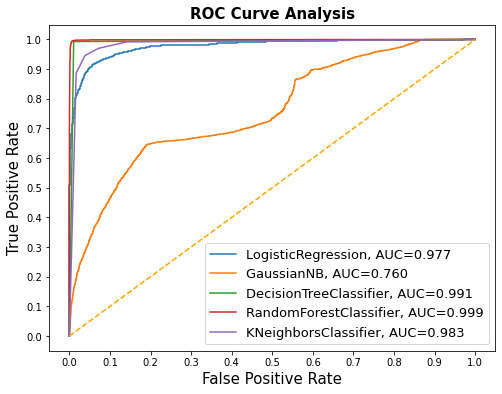

In [ ]:
# Plotting ROC curve
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()